## Public response to ChatGPT:
### Measuring public opinion and reactions based on tweets from the first month after ChatGPT's launch


- Leslie Cohrt: data preprocessing, writing results, graph customization
- Sarah Auther: data preprocessing, sentiment analysis, code formatting 
- Shoshana Medved: formulating research questions, introduction, project organization
- Rani Adikarjo: analysis, data visualization 

# <span style="color:red"> what we gotta do still </span>
- write the dataset description !
- word cloud for the whole dataset and the df_r2 -> compare differences- are there any buzzwords that get more attention. we talked about doing that- do we still want to? I vote yes; could you guys work on that?
- add comments to the code- that's one of her instructions. I worked on justifications of stuff but we can always have more. I think just adding in what stuff does? idk.
- review for general clarity
- i kinda wrote in results throughout but if you guys want to make a separate section at the end to sum it up I'm cool with that too!

#### Introduction

In this study, we aim to understand how people spoke about ChatGPT on Twitter during the first month of its launch. Through this project, we hope to pinpoint any key differences in responses as ChatGPT became more mainstream. By analyzing a data sample of over 200,000 Tweets from November 30th to December 31st, 2022, we will be able to search for key communication trends among users and recurring beliefs about ChatGPT as an emerging platform. 

We are interested in discovering how people view ChatGPT based on data from Twitter
- Through the lens of computer-mediated communication, how has public opinion of ChatGPT evolved as its usage has become more normalized?  
- What generates the most reaction between real people when talking about ChatGPT?

#### Dataset

# <span style="color:red">!!!!</span>

- Dataset Description: Introduce your chosen dataset. Give a detailed description of what this dataset is about, and use the df.describe() function to provide a basic statistical description of the dataset. You can choose a dataset from surveys, social media, or news articles. Make sure your research questions and the chosen dataset are matching.

In [33]:
import pandas as pd

df = pd.read_csv("chatgpt.data.csv")
df.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,country,photo_url,city,country_code
0,1.598010e+18,2022-11-30 18:00:15+00:00,2,0,0,0,ChatGPT: Optimizing Language Models for Dialog...,NaN,NaN,NaN,NaN
1,1.598010e+18,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking with ChatGPT, our new AI system wh...",NaN,NaN,NaN,NaN
2,1.598010e+18,2022-11-30 18:02:58+00:00,2,0,0,1,ChatGPT: Optimizing Language Models for Dialog...,NaN,https://pbs.twimg.com/media/Fi1J8HbWAAMv_yi.jpg,NaN,NaN
3,1.598020e+18,2022-11-30 18:05:58+00:00,561,8,25,66,"THRILLED to share that ChatGPT, our new model ...",NaN,https://pbs.twimg.com/media/Fi1Km3WUYAAfzHS.jpg,NaN,NaN
4,1.598020e+18,2022-11-30 18:06:01+00:00,1,0,0,0,"As of 2 minutes ago, @OpenAI released their ne...",NaN,NaN,NaN,NaN


In [34]:
df.describe()

,tweet_id,like_count,quote_count,reply_count,retweet_count
count,2.192940e+05,219294.000000,219294.000000,219294.000000,219294.000000
mean,1.602573e+18,16.827423,0.403253,1.230412,2.296725
std,3.020433e+15,487.831192,14.095652,25.448931,63.453391
min,1.598010e+18,0.000000,0.000000,0.000000,0.000000
25%,1.600100e+18,0.000000,0.000000,0.000000,0.000000
50%,1.601760e+18,1.000000,0.000000,0.000000,0.000000
75%,1.604880e+18,3.000000,0.000000,1.000000,0.000000
max,1.609340e+18,119321.000000,4598.000000,5184.000000,10593.000000


In [4]:
# preprocessing

import numpy as np

df1 = df.fillna(value=0)
df1 = df1.loc[df1["like_count"] != 0]

df1.describe()

,tweet_id,like_count,quote_count,reply_count,retweet_count
count,1.201360e+05,120136.000000,120136.000000,120136.000000,120136.000000
mean,1.602453e+18,30.716463,0.716072,2.120688,4.155083
std,2.985152e+15,658.769995,19.037848,34.355344,85.684421
min,1.598010e+18,1.000000,0.000000,0.000000,0.000000
25%,1.600020e+18,1.000000,0.000000,0.000000,0.000000
50%,1.601650e+18,2.000000,0.000000,0.000000,0.000000
75%,1.604640e+18,6.000000,0.000000,1.000000,1.000000
max,1.609340e+18,119321.000000,4598.000000,5184.000000,10593.000000


Our research questions are about shared public opinion and about opinions that generate conversation and response. Tweets with no likes are not indicative of opinions shared by many and do not generate response, so we removed them from the dataset.

In [5]:
!pip install nltk

import nltk

nltk.download('vader_lexicon')

nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

!pip install textblob
from textblob import TextBlob

import re

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached regex-2023.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (770 kB)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [6]:
# Word tokenization    
text = df1['tweet'].apply(word_tokenize)


In [7]:
print(text)

0         [ChatGPT, :, Optimizing, Language, Models, for...
1         [Try, talking, with, ChatGPT, ,, our, new, AI,...
2         [ChatGPT, :, Optimizing, Language, Models, for...
3         [THRILLED, to, share, that, ChatGPT, ,, our, n...
4         [As, of, 2, minutes, ago, ,, @, OpenAI, releas...
                                ...                        
219287    [One, of, my, new, favorite, thing, to, do, wi...
219288    [Sounds, like, AI, ca, n't, predict, 2023, tre...
219290    [I, asked, #, ChatGPT, to, write, a, #, NYE, J...
219291    [chatgpt, is, being, disassembled, until, it, ...
219292    [2023, predictions, by, #, chatGPT, ., Nothing...
Name: tweet, Length: 120136, dtype: object


In [8]:
import string

In [9]:
stop_words = set(stopwords.words('english'))

for column in df1.columns:
    if df1[column].dtype == 'object': # check if the column contains text data
        df1[column] = df1[column].apply(lambda x: ' '.join([word for word in str(x).split() if word.lower() not in stop_words]))

We tokenized the tweets and removed stopwords, which are commonly used and insignificant words, so that our world clouds and analyses would not be cluttered by them.

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [11]:
def get_sentiment(tweet):
    sentiment = sid.polarity_scores(tweet)
    return sentiment['compound']
    
df1['sentiment'] = df1['tweet'].apply(get_sentiment)

In [12]:
df1['sentiment']

0         0.4588
1         0.8225
2         0.4588
3         0.9029
4         0.0000
           ...  
219287    0.8481
219288    0.3612
219290    0.6360
219291    0.0000
219292    0.0000
Name: sentiment, Length: 120136, dtype: float64

In [13]:
df1.describe()

,tweet_id,like_count,quote_count,reply_count,retweet_count,sentiment
count,1.201360e+05,120136.000000,120136.000000,120136.000000,120136.000000,120136.000000
mean,1.602453e+18,30.716463,0.716072,2.120688,4.155083,0.206922
std,2.985152e+15,658.769995,19.037848,34.355344,85.684421,0.406783
min,1.598010e+18,1.000000,0.000000,0.000000,0.000000,-0.967400
25%,1.600020e+18,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.601650e+18,2.000000,0.000000,0.000000,0.000000,0.128000
75%,1.604640e+18,6.000000,0.000000,1.000000,1.000000,0.542300
max,1.609340e+18,119321.000000,4598.000000,5184.000000,10593.000000,0.990200


In [14]:
postive_tweets = df1[df1['sentiment'] > 0]
negative_tweets = df1[df1['sentiment'] < 0]
neutral_tweets = df1[df1['sentiment'] == 0]

postive_percentage = len(postive_tweets) / len(df1) * 100
negative_percentage = len(negative_tweets) / len(df1) * 100
neutral_percentage = len(neutral_tweets) / len(df1) * 100

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

We ran Sentiment Analysis and inserted the sentiment scores into our dataframe so that we can work with the scores to answer our research questions.

#### RQ1: How have people's opinions of ChatGPT evolved as its usage has become more normalized?

In [16]:
df1.sort_values(by=['created_at'], ascending=True, inplace=True)

df1.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,country,photo_url,city,country_code,sentiment
0,1.598010e+18,2022-11-30 18:00:15+00:00,2,0,0,0,ChatGPT: Optimizing Language Models Dialogue h...,0,0,0,0,0.4588
1,1.598010e+18,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking ChatGPT, new AI system optimized d...",0,0,0,0,0.8225
2,1.598010e+18,2022-11-30 18:02:58+00:00,2,0,0,1,ChatGPT: Optimizing Language Models Dialogue h...,0,https://pbs.twimg.com/media/Fi1J8HbWAAMv_yi.jpg,0,0,0.4588
3,1.598020e+18,2022-11-30 18:05:58+00:00,561,8,25,66,"THRILLED share ChatGPT, new model optimized di...",0,https://pbs.twimg.com/media/Fi1Km3WUYAAfzHS.jpg,0,0,0.9029
4,1.598020e+18,2022-11-30 18:06:01+00:00,1,0,0,0,"2 minutes ago, @OpenAI released new ChatGPT. \...",0,0,0,0,0.0000


data = df1

sns.scatterplot(x="created_at", y="sentiment", hue="sentiment", data=data)
plt.title("Sentiment Analysis Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.legend(title="Sentiment")
plt.show()

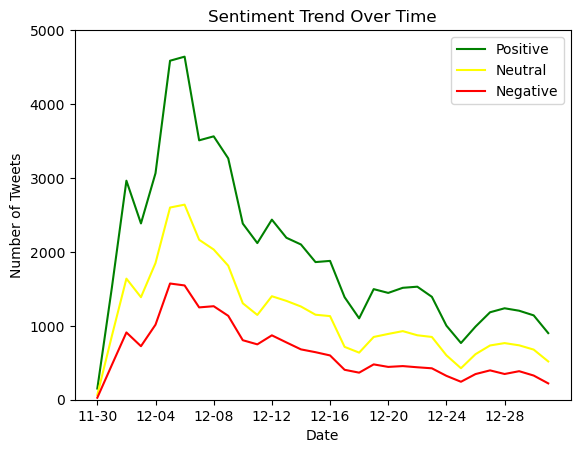

In [28]:
#Create dictionaries to store the number of positive, negative, and neutral sentiments for each day
pos_dict = {}
neutral_dict = {}
neg_dict = {}
dates = []

#Loop through entries in the dataframe to get a date string
for index, row in df1.iterrows():
    date = row['created_at'].split()[0][5:] #Use the split function to split the date from the time #To focus just on the date

#Inputting information from the dataframe into the dictionaries
    if date not in dates:
        dates.append(date)
        
#Sum the number of positive sentiment each day
    if row['sentiment'] > 0:
        if date in pos_dict:
            pos_dict[date] += 1
        else:
            pos_dict[date] = 1
            
#Sum the number of negative sentiment each day
    elif row['sentiment'] < 0:
        if date in neg_dict:
            neg_dict[date] += 1
        else:
            neg_dict[date] = 1
    else:

#Sum the number of neutral each day
        if date in neutral_dict:
            neutral_dict[date] += 1
        else:
            neutral_dict[date] = 1

#Fill in empty dates
for date in dates:
    if date not in pos_dict:
        pos_dict[date] = 0
    if date not in neutral_dict:
        neutral_dict[date] = 0
    if date not in neg_dict:
        neg_dict[date] = 0

#Retriving the values from the dictionaries
pos = list(pos_dict.values())
neutral = list(neutral_dict.values())
neg = list(neg_dict.values())

#Plot the values from the dictionaries into the graph
plt.plot(dates, pos, label = 'Positive', color='green')
plt.plot(dates, neutral, label = 'Neutral', color='yellow')
plt.plot(dates, neg, label = 'Negative', color='red')

#Create the labels and titles in the graph
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Trend Over Time')

#Creating the limits in the graphs for the x-axis and y-axis in order to most efficiently show the trend
plt.xticks(dates[::4])
plt.ylim(0, 5000)

plt.legend()
plt.show()

The graph shows that, although the amount of tweets about ChatGPT dropped as time went on, there were more positive tweets than either neutral or negative. Neutral tweets were the next most common, with negative tweets accounting for the least amount of tweets about ChatGPT. This suggests that public opinion of ChatGPT tended to be positive.

#### RQ2: What generates the most reaction between real people when talking about ChatGPT?

In [18]:
df_r2 = df1.loc[(df1["like_count"] >299) & (df1["reply_count"] >49) & (df1["retweet_count"] >49) & (df1["quote_count"] >24)]

df_r2.describe()

,tweet_id,like_count,quote_count,reply_count,retweet_count,sentiment
count,2.500000e+02,250.000000,250.000000,250.000000,250.000000,250.000000
mean,1.601852e+18,7658.344000,194.260000,315.696000,1052.952000,0.206099
std,3.320418e+15,12128.445301,368.221374,659.398603,1525.524037,0.409143
min,1.598010e+18,360.000000,26.000000,50.000000,54.000000,-0.831600
25%,1.599230e+18,2130.750000,43.000000,79.000000,260.000000,0.000000
50%,1.600480e+18,4072.000000,88.000000,136.500000,520.000000,0.089950
75%,1.604585e+18,7524.750000,186.750000,243.750000,1116.000000,0.557400
max,1.609240e+18,119321.000000,4598.000000,5184.000000,10593.000000,0.945100


In [19]:
postive_top_tweets = df_r2[df_r2['sentiment'] > 0]
negative_top_tweets = df_r2[df_r2['sentiment'] < 0]
neutral_top_tweets = df_r2[df_r2['sentiment'] == 0]

postive_percentage_top = len(postive_top_tweets) / len(df_r2) * 100
negative_percentage_top = len(negative_top_tweets) / len(df_r2) * 100
neutral_percentage_top = len(neutral_top_tweets) / len(df_r2) * 100

In [20]:
df_r2

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,country,photo_url,city,country_code,sentiment
1,1.598010e+18,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking ChatGPT, new AI system optimized d...",0,0,0,0,0.8225
5,1.598020e+18,2022-11-30 18:06:29+00:00,2376,72,85,372,"launched ChatGPT, new AI system optimized dial...",0,0,0,0,0.5423
36,1.598020e+18,2022-11-30 18:26:58+00:00,23201,827,477,4024,OK @OpenAI's new #ChatGPT basically generate #...,0,https://pbs.twimg.com/media/Fi1PSqaXEBAivit.png,0,0,0.5904
39,1.598020e+18,2022-11-30 18:29:47+00:00,26835,1142,898,4108,Google done.\n\nCompare quality responses (Cha...,0,https://pbs.twimg.com/media/Fi1QA60XwAAhrq0.jpg,0,0,0.0000
60,1.598030e+18,2022-11-30 19:06:41+00:00,3527,80,68,556,"OpenAI released ChatGPT. Damn, good. might GPT...",0,https://pbs.twimg.com/media/Fi1UrAyVQAARpe9.jpg,0,0,0.0516
...,...,...,...,...,...,...,...,...,...,...,...,...
212398,1.608690e+18,2022-12-30 05:02:57+00:00,3192,168,145,621,#ChatGPT video via #stablediffusion AI tools. ...,0,0,0,0,0.0000
212957,1.608750e+18,2022-12-30 09:14:29+00:00,4347,98,93,1098,📢 New #ChatGPT extension!\n\n`ChatGPT Writer` ...,0,0,0,0,0.0000
217074,1.609110e+18,2022-12-31 08:45:13+00:00,3165,72,485,113,"write ""thank you"" ChatGPT helps you? got idea ...",0,0,0,0,0.6249
217654,1.609170e+18,2022-12-31 12:35:14+00:00,2258,76,682,249,"code bug, go first?\n\n1. Google\n2. StackOver...",0,0,0,0,-0.4767


We reduced our dataset based on likes, replies, retweets, and quotes to find the 250 tweets that generated the most interaction throughout all categories.

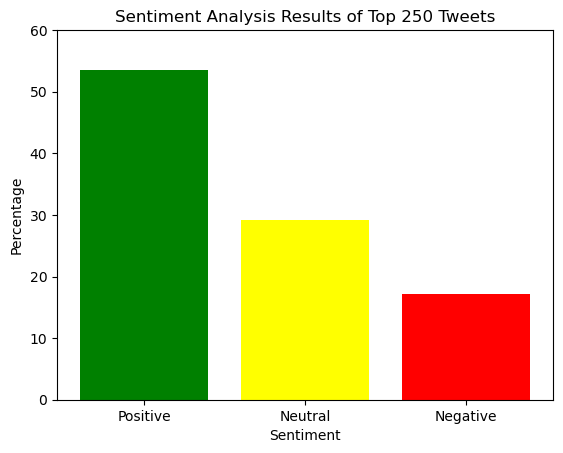

In [21]:
sentiment_labels_2 = ['Positive', 'Neutral', 'Negative']
sentiment_percentages_2 = [postive_percentage_top, neutral_percentage_top, negative_percentage_top]

plt.bar(sentiment_labels_2, sentiment_percentages_2, color = ('green','yellow','red'))
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Sentiment Analysis Results of Top 250 Tweets')
plt.ylim(0, 60)

plt.show()

The graph shows that of the top tweets, there were more positive tweets than any other sentiment. Neutral had the next greatest amound, and negative the least. This matches the breakdown of sentiments in the larger dataset, as demonstrated above, which suggests that sentiment is not what determines tweet interaction.

# Do we need this next graph?
(interaction trend over time)

if y'all can justify it tho then slay go for it; I just don't know what I would write to tie it in lol. 

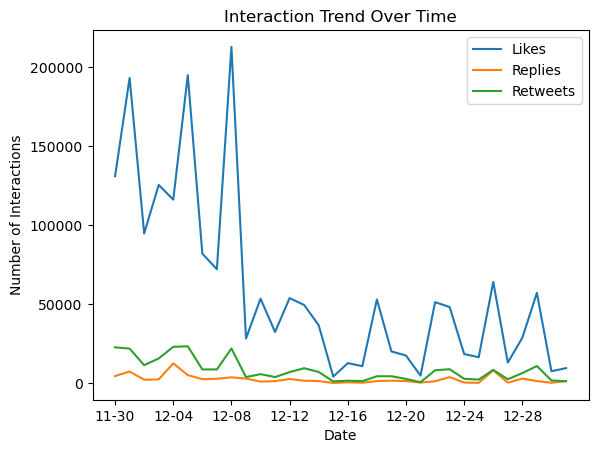

In [22]:
#Create dictionaries to store the number of likes, replies, and retweets for each day
like_dict = {}
reply_dict = {}
rt_dict = {}

#Loop through entries in the dataframe to get a date string
for index, row in df_r2.iterrows():
    date = row['created_at'].split()[0][5:] #Use the split function to split the date from the time

#Inputting information from the dataframe into the dictionaries
    if date in like_dict:
        like_dict[date] += row['like_count'] #Sum up the likes for each date
    else:
        like_dict[date] = row['like_count']
    if date in reply_dict:
        reply_dict[date] += row['reply_count'] #Sum up the replies for each date
    else:
        reply_dict[date] = row['reply_count']
    if date in rt_dict:
        rt_dict[date] += row['retweet_count'] #Sum up the retweets for each date
    else:
        rt_dict[date] = row['retweet_count']

#Retriving the values from the dictionaries
dates = list(like_dict.keys())
likes = list(like_dict.values())
replies = list(reply_dict.values())
retweets = list(rt_dict.values())

#Plotting the values obtained from the dictionaries into the graph
plt.plot(dates, likes, label = 'Likes')
plt.plot(dates, replies, label = 'Replies')
plt.plot(dates, retweets, label = 'Retweets')

#Creating the labels and titles of the graph
plt.xlabel('Date')
plt.ylabel('Number of Interactions')
plt.title('Interaction Trend Over Time')
plt.xticks(dates[::4]) #Fixing the labeling in the x-axis to make it more legible

plt.legend()
plt.show()

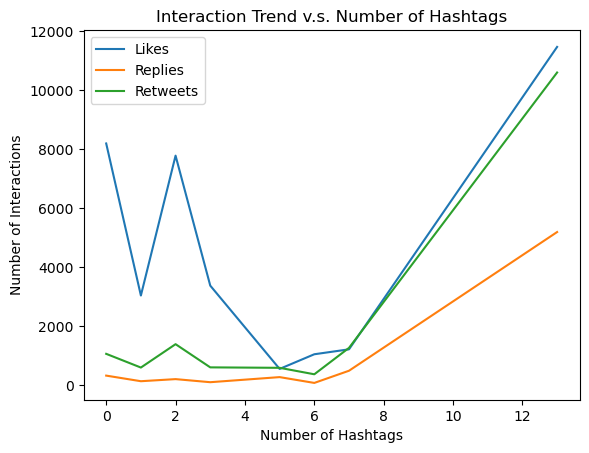

In [24]:
#Create dictionaries to store the number of likes, replies, and retweets for each tweets with certain number of hashtags
like_dict_ht = {}
reply_dict_ht = {}
rt_dict_ht = {}
count_dict_ht = {}

#Loop through entries in the dataframe to find the number of hashtags in a tweet
for index, row in df_r2.iterrows():
    num_ht = row['tweet'].count('#')

#Inputting information from the dataframe into the dictionaries
    if num_ht in like_dict_ht:
        like_dict_ht[num_ht] += row['like_count'] #Sum the number of likes in tweets for each number of hashtag
    else:
        like_dict_ht[num_ht] = row['like_count']
    if num_ht in reply_dict_ht:
        reply_dict_ht[num_ht] += row['reply_count'] #Sum the number of replies in tweets for each number of hashtag
    else:
        reply_dict_ht[num_ht] = row['reply_count']
    if num_ht in rt_dict_ht:
        rt_dict_ht[num_ht] += row['retweet_count'] #Sum the number of retweet in tweets for each number of hashtag
    else:
        rt_dict_ht[num_ht] = row['retweet_count']

#Count of occurrences
    if num_ht in count_dict_ht:
        count_dict_ht[num_ht] += 1
    else:
        count_dict_ht[num_ht] = 1

#Divide it by the count of occurrences to get the mean
for key in like_dict_ht:
    like_dict_ht[key] /= count_dict_ht[key]
    reply_dict_ht[key] /= count_dict_ht[key]
    rt_dict_ht[key] /= count_dict_ht[key]

#Retriving the needed values from the dictionaries
like_dict_ht = dict(sorted(like_dict_ht.items()))
reply_dict_ht = dict(sorted(reply_dict_ht.items()))
rt_dict_ht = dict(sorted(rt_dict_ht.items()))
    
hashtags = list(like_dict_ht.keys())
likes = list(like_dict_ht.values())
replies = list(reply_dict_ht.values())
retweets = list(rt_dict_ht.values())

#Plotting the values from the dictionaries into the graphs
plt.plot(hashtags, likes, label = 'Likes')
plt.plot(hashtags, replies, label = 'Replies')
plt.plot(hashtags, retweets, label = 'Retweets')

#Create labels and titles for the graphs
plt.xlabel('Number of Hashtags')
plt.ylabel('Number of Interactions')
plt.title('Interaction Trend v.s. Number of Hashtags')

plt.legend()
plt.show()

The graph shows that, at about 6 hashtags, the number of likes, replies, and retweets the most popular tweets got began to increase steadily. Replies and retweets were consistently lower before, and while likes fluctuated more on tweets with less than 6 hashtags, the amount of likes also steadily increased starting at 6. This suggests that amount of hashtags is directly related to amount of interaction a tweet receives.

#### <span style="color:red">^Please for the love of god help me rephrase that I have no idea how to write lmao</span>